## OVERVIEW:
Dữ liệu có liên quan đến các chiến dịch tiếp thị trực tiếp (gọi điện thoại) của một tổ chức ngân hàng Bồ Đào Nha. Mục tiêu phân loại là dự đoán liệu khách hàng có đăng ký một khoản tiền gửi có kỳ hạn (biến y) hay không.



## QUESTION ABOUT DATASET:
1. Những yếu tố sau có ảnh hưởng tới việc được chấp thuận gửi tiền không?
* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
2. Kết quả của chiến dịch trước đó (poutcome) với biến ý có mối quan hệ nào (nếu kết quả của poutcome là sucess thì biến ý thế nào)?
3. Số lượng nhân viên (nr.employed) được tính trên khu vực nào?

## REFERENCE
* [Towardsdatascience](https://towardsdatascience.com/machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c)
    - Use AUC-ROC
* [eda-feature-engineering-and-machine-learning](https://www.kaggle.com/kaushikholla/eda-feature-engineering-and-machine-learning)
    - Social and economic context attributes affect the outcome the most
* [subscription-prediction-for-bank-marketing-data](https://www.kaggle.com/sachinrajput17/subscription-prediction-for-bank-marketing-data)

## ANALYTICS QUESTIONS:
* Quan sát phân bố của các biến phân loại (tuổi, giới tính, giáo dục, ..vv..)
* Kiểm tra Outliers đối với biến tuổi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep = ';')
bank.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [13]:
bank.describe(include='object')


job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

In [5]:
pp.ProfileReport(bank)


Render HTML: 100%|██████████| 1/1 [00:04<00:00,  4.13s/it]


In [10]:
bank[bank.duplicated(keep='first')]


age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1266   telephone   may         thu  ...         1    999         0   
12261  telephone   jul         thu  ...         1    999         0   
14234   cellular   jul         mon  ...         2    999         0   
16956   cellular   jul         thu  ...         3    999         0   
18465   cellular   jul         thu  ...         1    999         0   
20216   cellular   aug         mon  ...         1    999         0   
20534   cellular   aug         tue  ...         1    999         0   
25217   cellular   nov         tue  ...         2    999         0   
28477   cellular   apr         tue  ...         1    999         0   
32516   cellular   may         fri  ...         4    999         0   
36951   cellular   jul         thu  ...         1    999         0   
38281  telephone   oct         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1266   nonexistent          1.1          93.994          -36.4      4.855   
12261  nonexistent          1.4          93.918          -42.7      4.966   
14234  nonexistent          1.4          93.918          -42.7      4.962   
16956  nonexistent          1.4          93.918          -42.7      4.962   
18465  nonexistent          1.4          93.918          -42.7      4.968   
20216  nonexistent          1.4          93.444          -36.1      4.965   
20534  nonexistent          1.4          93.444          -36.1      4.966   
25217  nonexistent         -0.1          93.200          -42.0      4.153   
28477  nonexistent         -1.8          93.075          -47.1      1.423   
32516  nonexistent         -1.8          92.893          -46.2      1.313   
36951  nonexistent         -2.9          92.469          -33.6      1.072   
38281  nonexistent         -3.4          92.431          -26.9      0.742   

       nr.employed    y  
1266        5191.0   no  
12261       5228.1   no  
14234       5228.1   no  
16956       5228.1   no  
18465       5228.1   no  
20216       5228.1   no  
20534       5228.1   no  
25217       5195.8   no  
28477       5099.1   no  
32516       5099.1   no  
36951       5076.2  yes  
38281       5017.5   no  

[12 rows x 21 columns]

In [11]:
def missing_data(df):
    total = df.isnull().sum()
    percent = total/df.isnull().count()*100
    missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    missing_values['Types'] = types
    missing_values.sort_values('Total',ascending=False,inplace=True)
    return(np.transpose(missing_values))
missing_data(bank)

age campaign nr.employed euribor3m cons.conf.idx cons.price.idx  \
Total        0        0           0         0             0              0   
Percent    0.0      0.0         0.0       0.0           0.0            0.0   
Types    int64    int64     float64   float64       float64        float64   

        emp.var.rate poutcome previous  pdays  ...     job day_of_week  \
Total              0        0        0      0  ...       0           0   
Percent          0.0      0.0      0.0    0.0  ...     0.0         0.0   
Types        float64   object    int64  int64  ...  object      object   

          month contact    loan housing default education marital       y  
Total         0       0       0       0       0         0       0       0  
Percent     0.0     0.0     0.0     0.0     0.0       0.0     0.0     0.0  
Types    object  object  object  object  object    object  object  object  

[3 rows x 21 columns]

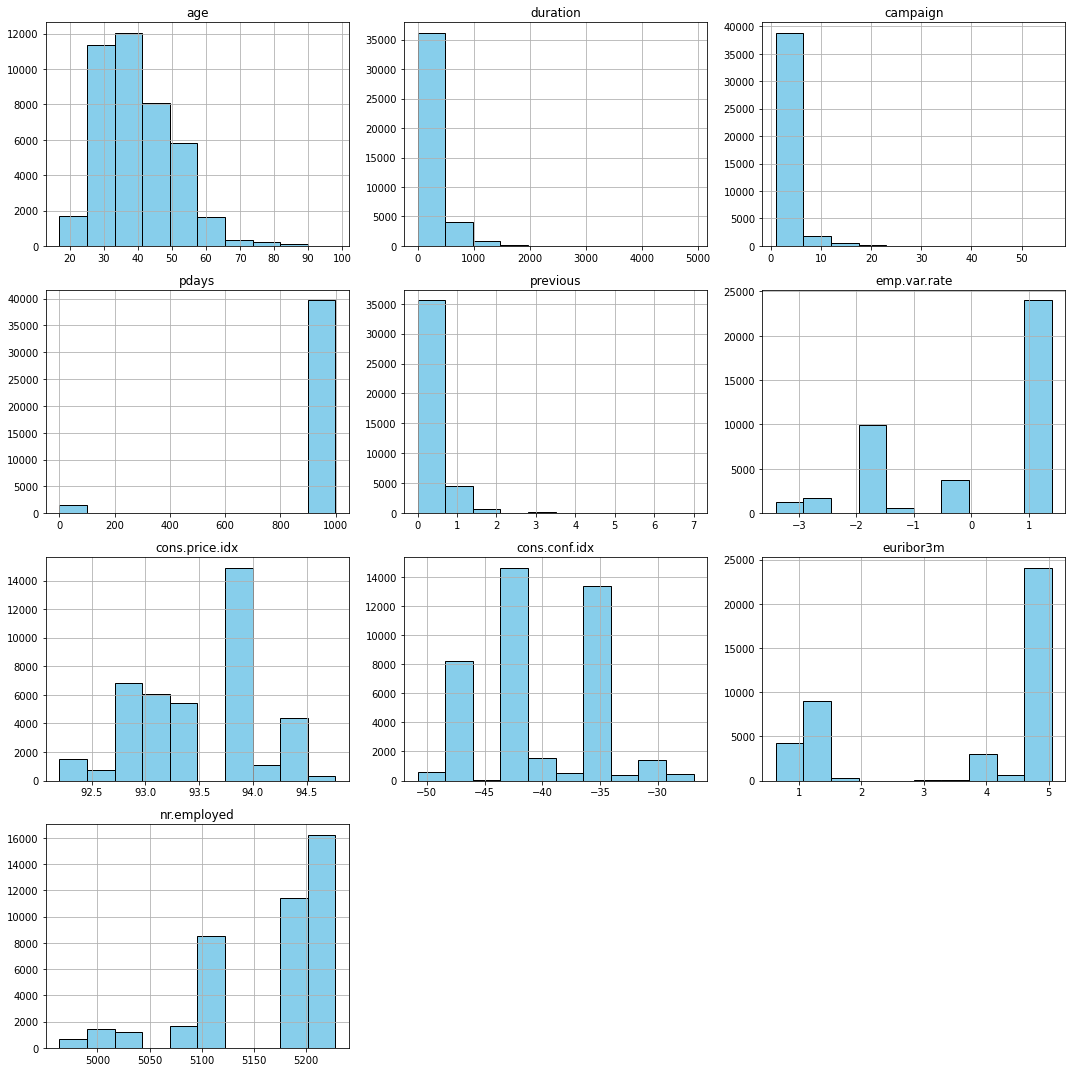

In [19]:
bank.hist(figsize=(15,15),edgecolor='k',color='skyblue')
plt.tight_layout()
plt.show()